# Simple Linear Regression-1

Q1) Delivery_time -> Predict delivery time using sorting time 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [47]:
time=pd.read_csv("delivery_time.csv")
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
time.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [8]:
time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
time.shape

(21, 2)

## Visualisation

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3e29677f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3e2967d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3e2967220>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3e2875760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3e29342b0>],
 'means': []}

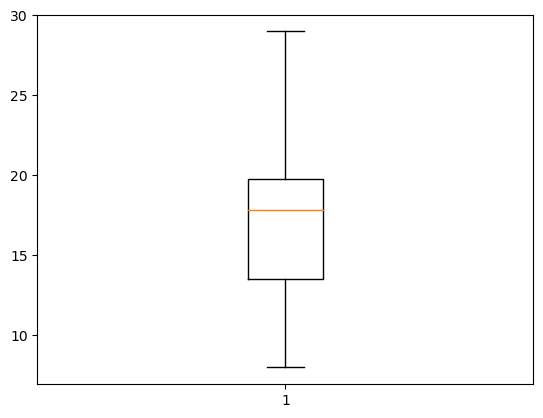

In [11]:
plt.boxplot(time['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3e2b62f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3e2b62ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3e29ba910>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3e2b654f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3e28a2df0>],
 'means': []}

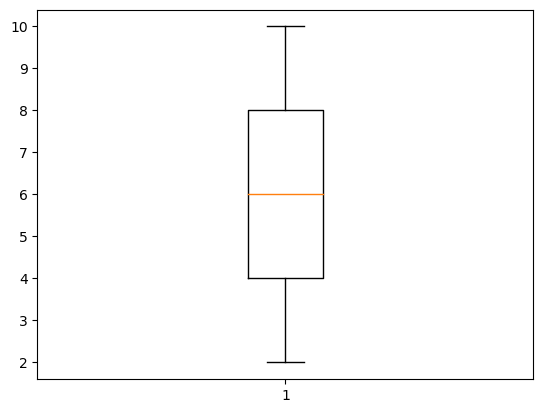

In [12]:
plt.boxplot(time['Sorting Time'])

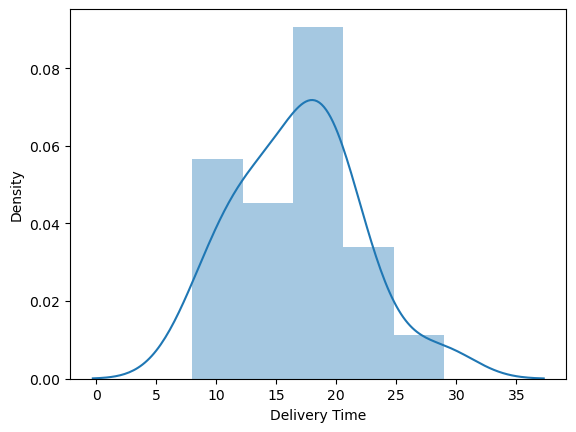

In [16]:
sns.distplot(time['Delivery Time'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

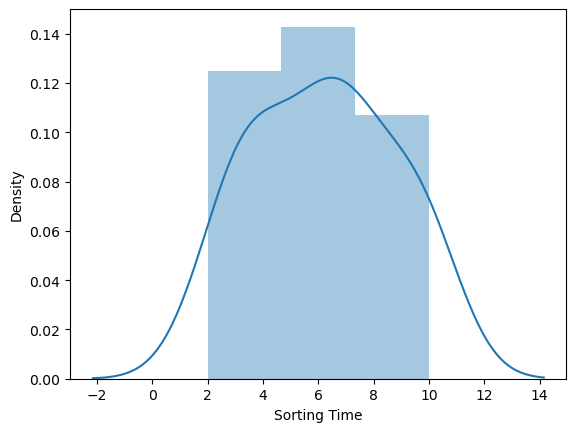

In [18]:
sns.distplot(time['Sorting Time'])

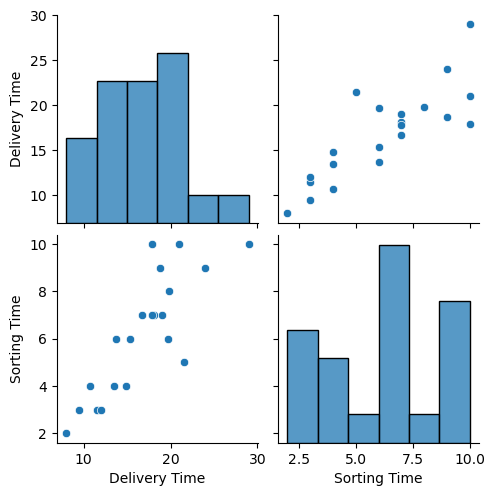

In [19]:
sns.pairplot(time)

In [20]:
time=time.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [21]:
time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

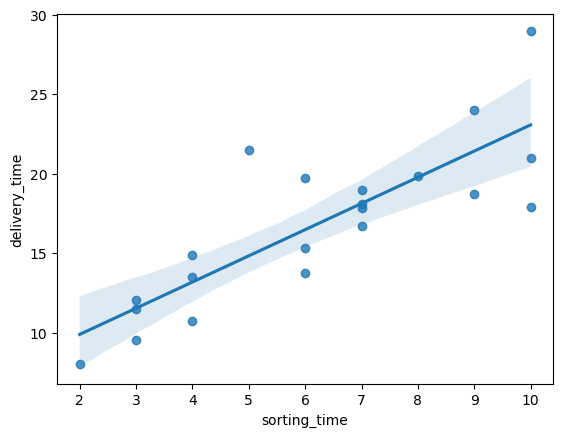

In [22]:
sns.regplot(x=time['sorting_time'],y=time['delivery_time'])

# Model Building

## No transformation

In [23]:
import statsmodels.formula.api as smf
model1=smf.ols('delivery_time~sorting_time',data=time).fit()

In [27]:
print(model1.params,'\n', model1.tvalues,'\n',model1.pvalues)

Intercept       6.582734
sorting_time    1.649020
dtype: float64 
 Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [28]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        14:00:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exponential transformation

In [30]:
model2=smf.ols('np.log(delivery_time)~np.log(sorting_time)',data=time).fit()

In [31]:
print(model2.params,'\n',model2.tvalues,'\n',model2.pvalues)

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64 
 Intercept               13.085552
np.log(sorting_time)     8.024484
dtype: float64 
 Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [32]:
(model2.rsquared,model2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 19 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                           14:09:32   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square transformation

In [34]:
model3=smf.ols('delivery_time~np.square(sorting_time)',data=time).fit()
print(model3.params,'\n',model3.tvalues,'\n',model3.pvalues)

Intercept                  11.237205
np.square(sorting_time)     0.124870
dtype: float64 
 Intercept                  9.398601
np.square(sorting_time)    5.691330
dtype: float64 
 Intercept                  1.415704e-08
np.square(sorting_time)    1.739194e-05
dtype: float64


In [35]:
(model3.rsquared,model3.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [36]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.74e-05
Time:                        14:16:27   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square root transformation of X

In [37]:
model4=smf.ols('delivery_time~np.sqrt(sorting_time)',data=time).fit()
print(model4.params,'\n',model4.tvalues,'\n',model4.pvalues)

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64 
 Intercept               -0.840911
np.sqrt(sorting_time)    6.592434
dtype: float64 
 Intercept                0.410857
np.sqrt(sorting_time)    0.000003
dtype: float64


In [38]:
(model4.rsquared,model4.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

In [39]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        14:19:58   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square root transformation of Y

In [40]:
model5=smf.ols('np.sqrt(delivery_time)~sorting_time',data=time).fit()
print(model5.params,'\n',model5.tvalues,'\n',model5.pvalues)

Intercept       2.772731
sorting_time    0.206632
dtype: float64 
 Intercept       13.527452
sorting_time     6.723095
dtype: float64 
 Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64


In [41]:
(model5.rsquared,model5.rsquared_adj)

(0.704049871541756, 0.6884735489913221)

In [42]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.704
Model:                                OLS   Adj. R-squared:                  0.688
Method:                     Least Squares   F-statistic:                     45.20
Date:                    Thu, 19 Jan 2023   Prob (F-statistic):           2.00e-06
Time:                            14:37:44   Log-Likelihood:                -6.6646
No. Observations:                      21   AIC:                             17.33
Df Residuals:                          19   BIC:                             19.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square root transformation of X & Y

In [43]:
model6=smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)',data=time).fit()
print(model6.params,'\n',model6.tvalues,'\n',model6.pvalues)

Intercept                1.613479
np.sqrt(sorting_time)    1.002217
dtype: float64 
 Intercept                4.628248
np.sqrt(sorting_time)    7.152817
dtype: float64 
 Intercept                1.833621e-04
np.sqrt(sorting_time)    8.475706e-07
dtype: float64


In [44]:
(model6.rsquared,model6.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

In [45]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 19 Jan 2023   Prob (F-statistic):           8.48e-07
Time:                            14:41:30   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""